## EDA World Population Data

In this Project, we are going to perform EDA on World Population Data using Pandas, Seaborn & Matplotlib libraries

In [152]:
## Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
## Loadig the CSV file
df = pd.read_csv("world_population_data.csv")

In [154]:
df.shape ## the data has 234 rows & 17 columns

(234, 17)

In [155]:
df.columns ##17 column names

Index(['rank', 'cca3', 'country', 'continent', '2023 population',
       '2022 population', '2020 population', '2015 population',
       '2010 population', '2000 population', '1990 population',
       '1980 population', '1970 population', 'area (km²)', 'density (km²)',
       'growth rate', 'world percentage'],
      dtype='object')

In [156]:
df.head()

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.0,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.0,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.0,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.0,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.0,312,1.98%,3.00%


In [157]:
## checking whether the data has null values
df.isna().sum().sum() ## data has no null values

np.int64(0)

In [158]:
## checking whether the data has duplicate values
df.duplicated().sum().sum() ## data has no duplicate values

np.int64(0)

In [159]:
# Remove the % in growth rate column and convert to float
df["growth rate"] = df["growth rate"].str.replace("%", "", regex=False).astype(float)

In [160]:
## Total world wide population
df["2023 population"].sum()

np.int64(8043615390)

Text(0, 0.5, 'Frequency')

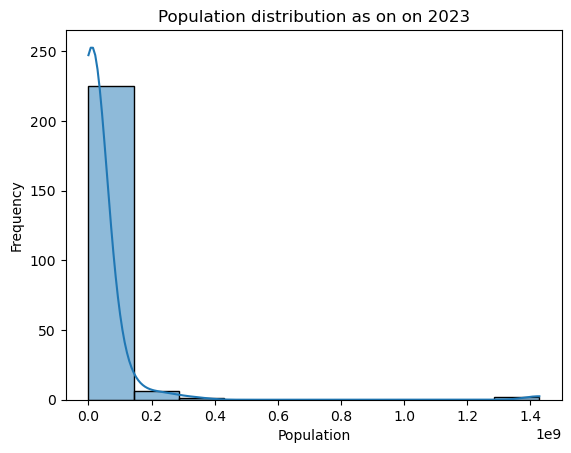

In [161]:
## creatig an histogram for 2023 population
sns.histplot(df["2023 population"],bins = 10,kde=True)
plt.title("Population distribution as on on 2023")
plt.xlabel("Population")
plt.ylabel("Frequency")

<Axes: xlabel='2023 population', ylabel='density (km²)'>

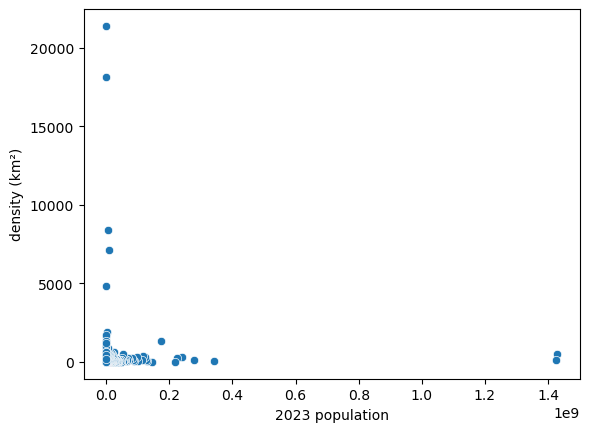

In [162]:
## Creating Scatter plot of density vs population
sns.scatterplot(x="2023 population",y="density (km²)",data=df)

<Axes: xlabel='2023 population', ylabel='area (km²)'>

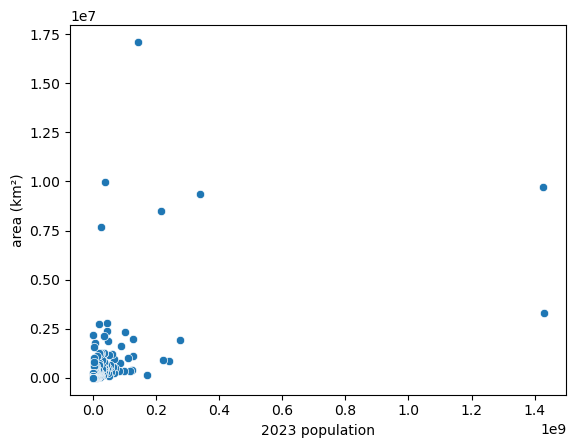

In [163]:
## Creating Scatter plot of Area vs population
sns.scatterplot(x="2023 population",y="area (km²)",data=df)

## Continent wise Analysis

In [164]:
## Number of countries by continent
country_count = df.groupby("continent")["cca3"].count().reset_index()
country_count.columns = ["continent","No_of_countries"]
country_count

,continent,No_of_countries
0,Africa,57
1,Asia,50
2,Europe,50
3,North America,40
4,Oceania,23
5,South America,14


In [165]:
## Caculating Population by continents
Continent1 = df.groupby("continent")["2023 population"].sum()
Continent1 = Continent1.reset_index().sort_values("2023 population",ascending=False)
Continent1

,continent,2023 population
1,Asia,4751819588
0,Africa,1460476458
2,Europe,741869197
3,North America,604155369
5,South America,439719009
4,Oceania,45575769


In [166]:
## Continent wise country count & population
Continent1.merge(country_count,how="inner",on="continent")

,continent,2023 population,No_of_countries
0,Asia,4751819588,50
1,Africa,1460476458,57
2,Europe,741869197,50
3,North America,604155369,40
4,South America,439719009,14
5,Oceania,45575769,23


Text(0.5, 1.0, 'Total population by continents')

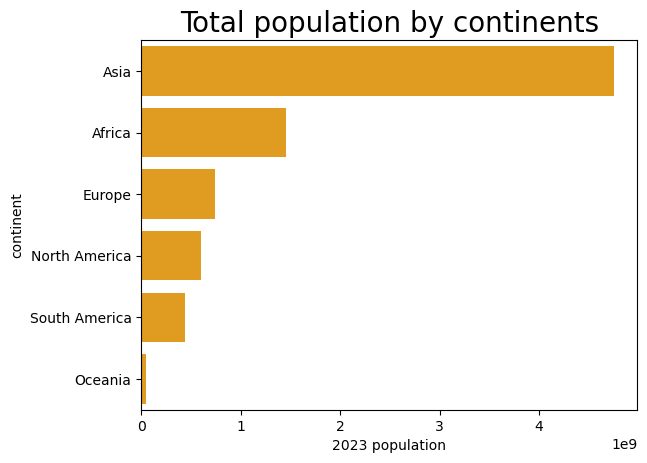

In [167]:
##plotting bargraph
sns.barplot(x="2023 population",y="continent",data=Continent1,color="Orange")
plt.title("Total population by continents",fontsize = 20)

In [168]:
## Caculating Area by continents
Continent2 = df.groupby("continent")["area (km²)"].sum()
Continent2 = Continent2.reset_index().sort_values("area (km²)",ascending=False)
Continent2

,continent,area (km²)
1,Asia,32138143.90
0,Africa,30317963.00
3,North America,24244178.00
2,Europe,23010411.26
5,South America,17833382.00
4,Oceania,8515218.00


Text(0.5, 1.0, 'Total Area by continents')

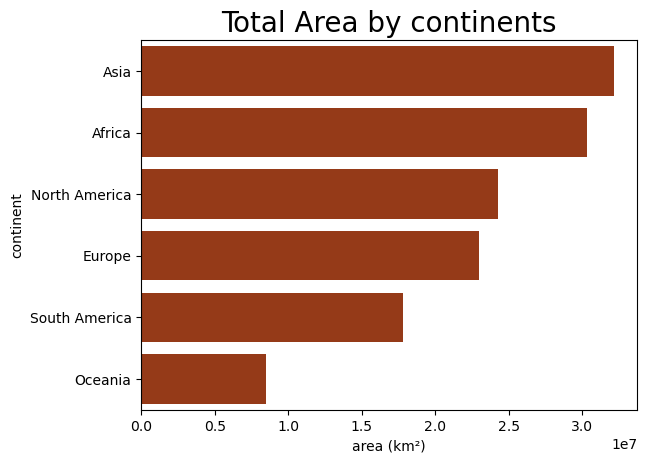

In [169]:
##plotting bargraph
sns.barplot(x="area (km²)",y="continent",data=Continent2,color="#AA3003")
plt.title("Total Area by continents",fontsize = 20)

In [170]:
## calculating avg density & growth rate by continent
Continent3 = df.groupby("continent")[["density (km²)","growth rate"]].mean()
Continent3 = Continent3.reset_index().sort_values("density (km²)",ascending=False)
Continent3

,continent,density (km²),growth rate
1,Asia,1005.460000,0.948000
2,Europe,669.540000,0.179000
3,North America,274.300000,0.455750
4,Oceania,133.217391,0.859565
0,Africa,131.666667,2.126491
5,South America,22.071429,0.877143


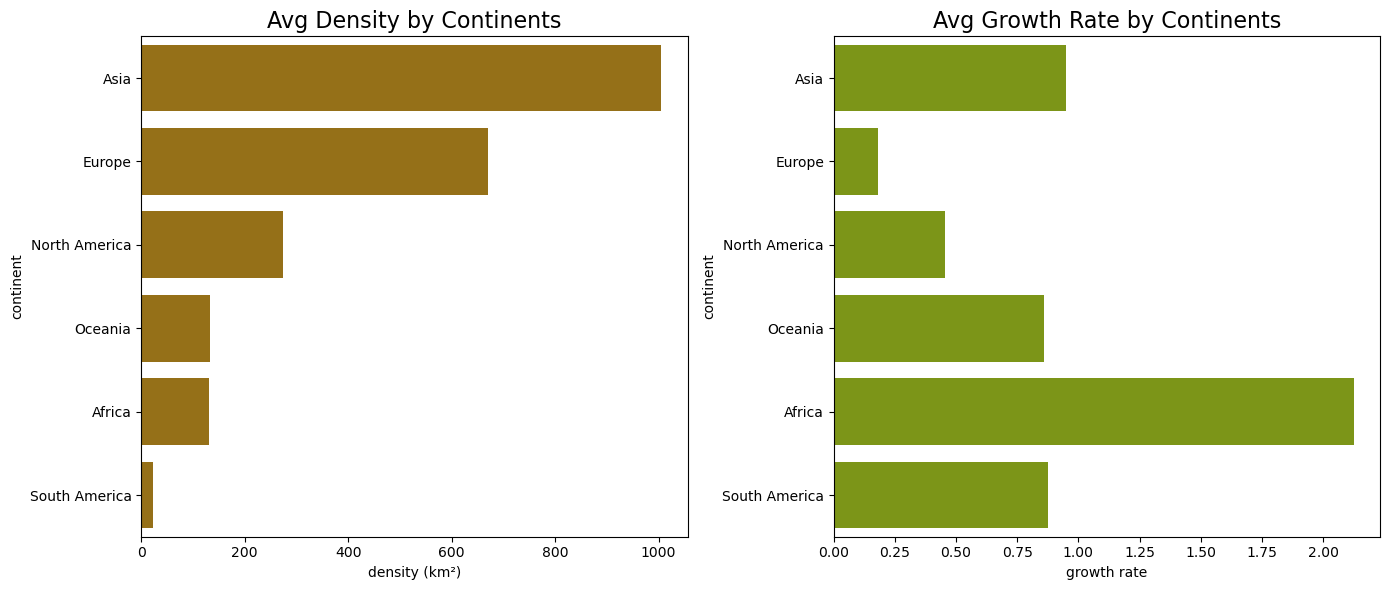

In [171]:
## plotting the graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# First subplot: Density
sns.barplot(x="density (km²)", y="continent", data=Continent3, color="#AA7803", ax=axes[0])
axes[0].set_title("Avg Density by Continents", fontsize=16)

# Second subplot: Growth rate
sns.barplot(x="growth rate", y="continent", data=Continent3, color="#89AA03", ax=axes[1])
axes[1].set_title("Avg Growth Rate by Continents", fontsize=16)

plt.tight_layout()  # Adjust spacing
plt.show()


<Axes: xlabel='continent', ylabel='density (km²)'>

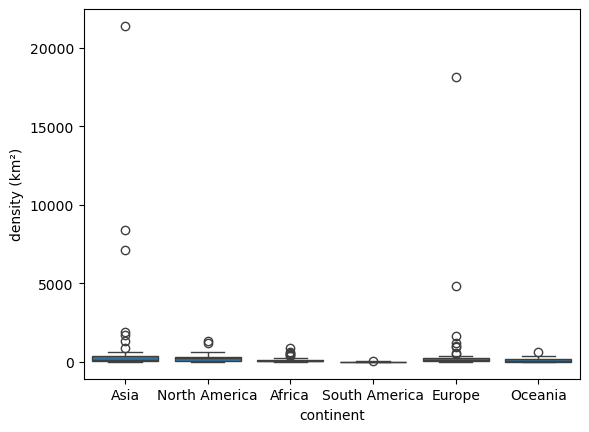

In [172]:
## Box plot of density by countries with outliers
sns.boxplot(data=df,x="continent",y="density (km²)")

C:\Users\balus\AppData\Local\Temp\ipykernel_11320\1739945442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="continent",y="density (km²)",showfliers = False,palette="muted")


<Axes: xlabel='continent', ylabel='density (km²)'>

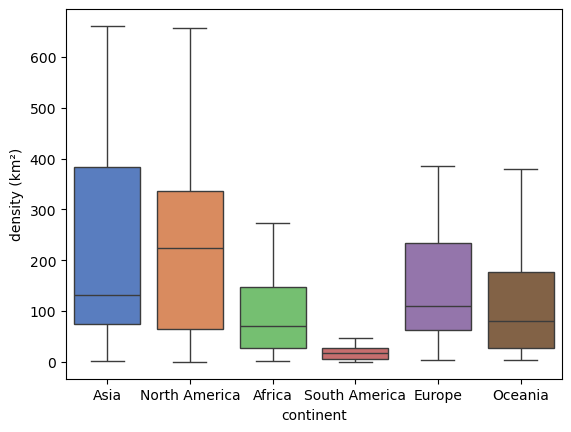

In [173]:
## Box plot of density by countries without outliers
sns.boxplot(data=df,x="continent",y="density (km²)",showfliers = False,palette="muted")

In [174]:
df.columns

Index(['rank', 'cca3', 'country', 'continent', '2023 population',
       '2022 population', '2020 population', '2015 population',
       '2010 population', '2000 population', '1990 population',
       '1980 population', '1970 population', 'area (km²)', 'density (km²)',
       'growth rate', 'world percentage'],
      dtype='object')

## Country wise Analysis

In [175]:
## Top 5 countries by 2023 population
Top_5_by_popluation = df.sort_values("2023 population",ascending=False).\
head()[["country","continent","2023 population"]]
Top_5_by_popluation

,country,continent,2023 population
0,India,Asia,1428627663
1,China,Asia,1425671352
2,United States,North America,339996563
3,Indonesia,Asia,277534122
4,Pakistan,Asia,240485658


Text(0.5, 1.0, 'Top 5 countries by Population')

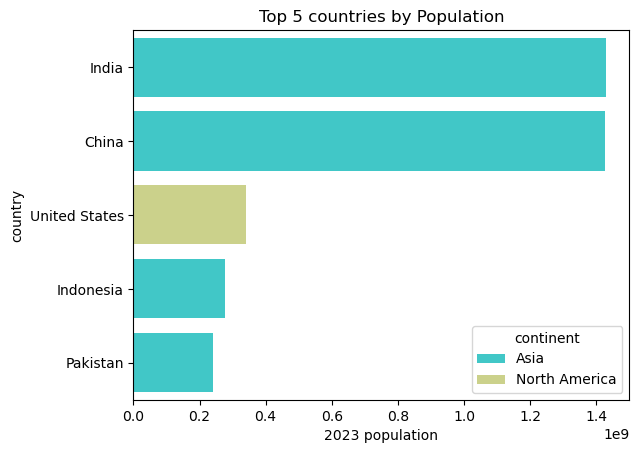

In [176]:
sns.barplot(y="country",x="2023 population",data=Top_5_by_popluation,
hue="continent",palette="rainbow")
plt.title("Top 5 countries by Population")


In [177]:
## Top 5 countries by 2023 Area
Top_5_by_Area = \
df.sort_values("area (km²)",ascending=False).head()[["country","continent","area (km²)"]]
Top_5_by_Area

,country,continent,area (km²)
8,Russia,Europe,17098242.0
37,Canada,North America,9984670.0
1,China,Asia,9706961.0
2,United States,North America,9372610.0
6,Brazil,South America,8515767.0


Text(0.5, 1.0, 'Top 5 countries by Area')

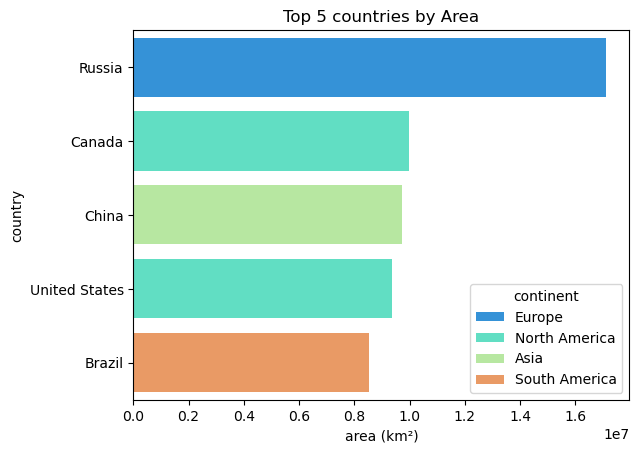

In [178]:
sns.barplot(y="country",x="area (km²)",data=Top_5_by_Area,palette="rainbow",hue="continent")
plt.title("Top 5 countries by Area")

In [179]:
## Top 5 countries by 2023 Density
Top_5_by_Density = \
df.sort_values("density (km²)",ascending=False).head()[["country","continent","density (km²)"]]
Top_5_by_Density

,country,continent,density (km²)
166,Macau,Asia,21403
216,Monaco,Europe,18149
113,Singapore,Asia,8377
103,Hong Kong,Asia,7135
218,Gibraltar,Europe,4807


Text(0.5, 1.0, 'Top 5 countries by Density')

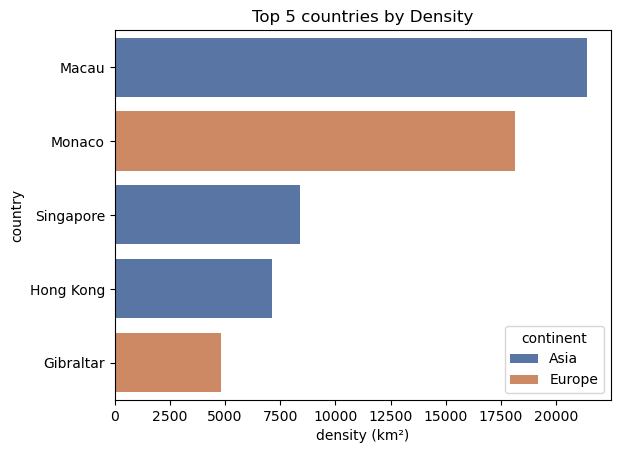

In [180]:
sns.barplot(y="country",x="density (km²)",data=Top_5_by_Density,hue="continent",palette="deep")
plt.title("Top 5 countries by Density")


In [181]:
## Top 5 countries by 2023 Growth_rate
Top_5_by_Growth_rate = \
df.sort_values("growth rate",ascending=False).head()[["country","continent","growth rate"]]
Top_5_by_Growth_rate

,country,continent,growth rate
59,Syria,Asia,4.98
133,Moldova,Europe,4.98
53,Niger,Africa,3.80
14,DR Congo,Africa,3.29
66,Chad,Africa,3.13


Text(0.5, 1.0, 'Top 5 countries by Growth rate')

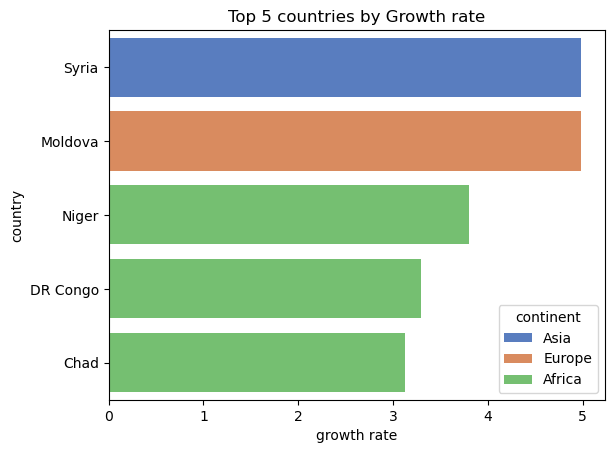

In [182]:
sns.barplot(y="country",x="growth rate",data=Top_5_by_Growth_rate,
hue="continent",palette="muted")
plt.title("Top 5 countries by Growth rate")

In [183]:
df.columns

Index(['rank', 'cca3', 'country', 'continent', '2023 population',
       '2022 population', '2020 population', '2015 population',
       '2010 population', '2000 population', '1990 population',
       '1980 population', '1970 population', 'area (km²)', 'density (km²)',
       'growth rate', 'world percentage'],
      dtype='object')

In [184]:
## Bottom 5 countries by 2023 population
Bottom_5_by_popluation = df.sort_values("2023 population",ascending=True).\
head()[["country","continent","2023 population"]]
Bottom_5_by_popluation

,country,continent,2023 population
233,Vatican City,Europe,518
232,Tokelau,Oceania,1893
231,Niue,Oceania,1935
230,Falkland Islands,South America,3791
229,Montserrat,North America,4386


Text(0.5, 1.0, 'Bottom 5 countries by Population')

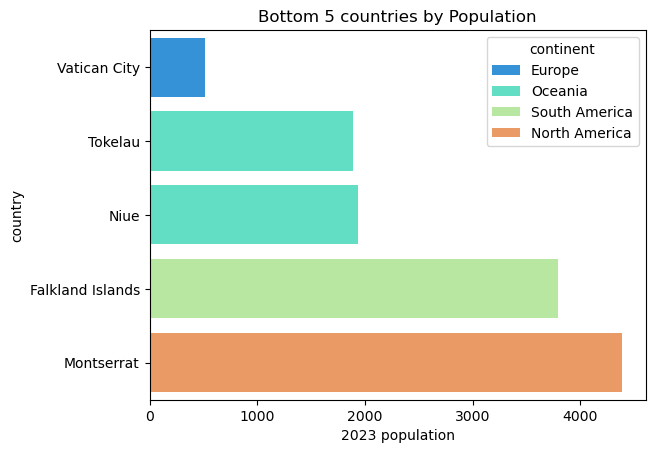

In [185]:
sns.barplot(y="country",x="2023 population",data=Bottom_5_by_popluation,
hue="continent",palette="rainbow")
plt.title("Bottom 5 countries by Population")

In [186]:
## Bottom 5 countries by 2023 Area
Bottom_5_by_Area = \
df.sort_values("area (km²)",ascending=True).head()[["country","continent","area (km²)"]]
Bottom_5_by_Area

,country,continent,area (km²)
233,Vatican City,Europe,0.44
216,Monaco,Europe,2.02
218,Gibraltar,Europe,6.80
232,Tokelau,Oceania,12.00
227,Saint Barthelemy,North America,21.00


Text(0.5, 1.0, 'Bottom 5 countries by Area')

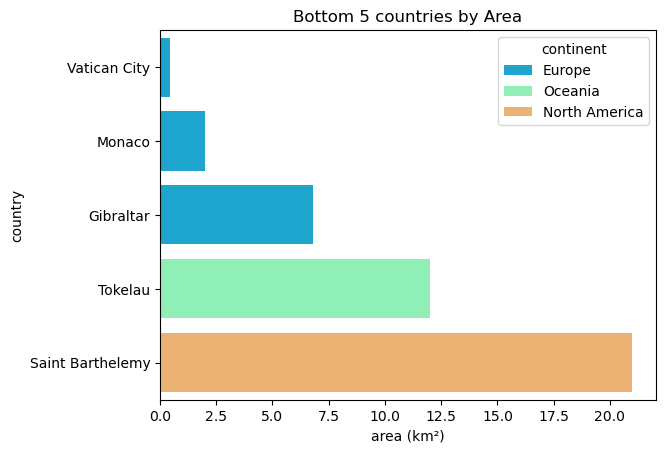

In [187]:
sns.barplot(y="country",x="area (km²)",data=Bottom_5_by_Area,palette="rainbow",hue="continent")
plt.title("Bottom 5 countries by Area")

In [188]:
## Bottom 5 countries by 2023 Density
Bottom_5_by_Density = \
df.sort_values("density (km²)",ascending=True).head()[["country","continent","density (km²)"]]
Bottom_5_by_Density

,country,continent,density (km²)
207,Greenland,North America,0
230,Falkland Islands,South America,0
171,Western Sahara,Africa,2
132,Mongolia,Asia,2
54,Australia,Oceania,3


In [189]:
## Bottom 5 countries by 2023 Growth_rate
Bottom_5_by_Growth_rate = \
df.sort_values("growth rate",ascending=True).head()[["country","continent","growth rate"]]
Bottom_5_by_Growth_rate

,country,continent,growth rate
40,Ukraine,Europe,-7.45
121,Lebanon,Asia,-2.47
109,Bulgaria,Europe,-1.39
141,Lithuania,Europe,-1.15
150,Latvia,Europe,-1.10


Text(0.5, 1.0, 'Bottom 5 countries by Growth rate')

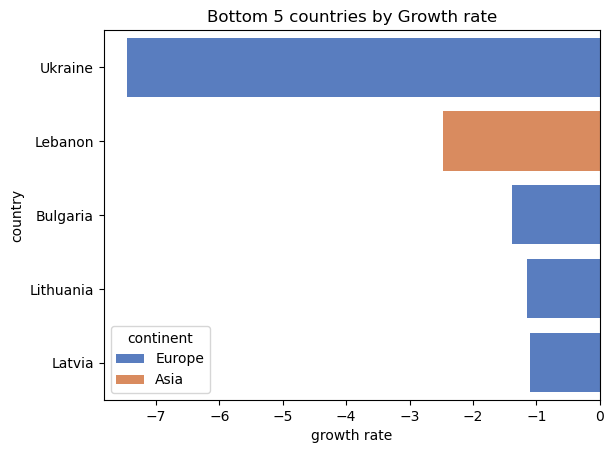

In [190]:
sns.barplot(y="country",x="growth rate",data=Bottom_5_by_Growth_rate,
hue="continent",palette="muted")
plt.title("Bottom 5 countries by Growth rate")

## Thank you